**Introduction**

The metric I decided to go with for my project was housing tenure. I originally was going to attempt to rank school districts for my metric, but it turns out there isn't much data for that on the internet. I think housing tenure is a good metric to choose because it gives insight on how many residents are chosing to move in AND stay at that location. An area with a high percentage of occupied/total houses would suggest the area is more appealing to live in.

**The Metric**

The metric measured in general is housing retention. The information I am using comes from census data and will use those geographic regions to group the different neighborhoods. The metric will take the amount of occupied houses (owned/rented) over the population density to find the % score for that area. This will hopefully normalize some of the extremely dense and sparse communities. Some neighborhoods have multiple census tracts and in that case the totals will be added together before division. The raw data comes from data report that geographically projects these statistics on to a map of Allegheny County. With my data, I want to group this data by neighborhood name so I use another table that contains the census tracts for each neighborhood. I will most likely have to join the tables in some manner and that might involve modifying one of the tables in some manner.

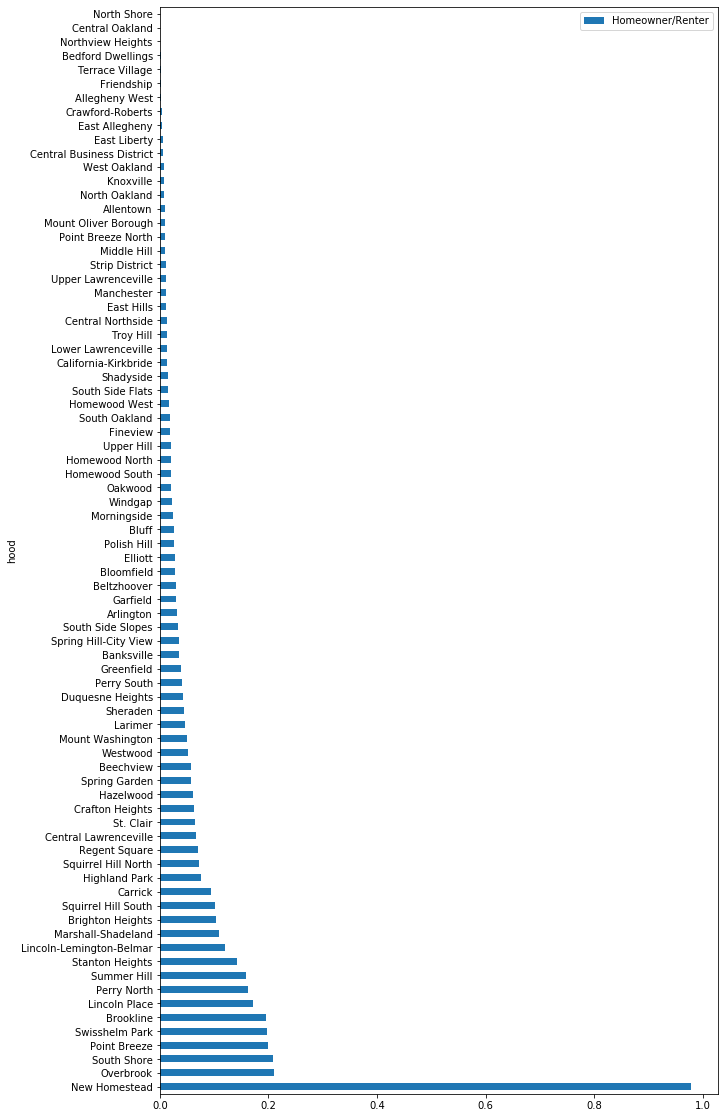

In [379]:
import pandas as pd
import numpy as np


hdata = pd.read_csv("housing.csv")
tracts = pd.read_csv("tracts.csv")

#a format so i can set up the join
tracts = tracts.astype({'tracttext' : float})

#here i join the two tables so the tables/neighborhood can be easily manipulated, then clean it up for what i need
merged = pd.merge(hdata, tracts, how='left',left_on='Census Tract',right_on="tracttext") 
merged = merged[['hood','TotalPopulation','OwnedMortgage','OwnedFree','RenterOccupied','sqmiles']]
merged['TotalPopulation'] = merged['TotalPopulation'].str.replace(',','')
merged['OwnedMortgage'] = merged['OwnedMortgage'].str.replace(',','')
merged['OwnedFree'] = merged['OwnedFree'].str.replace(',','')
merged['RenterOccupied'] = merged['RenterOccupied'].str.replace(',','')
merged = merged.dropna()
merged = merged.astype({'TotalPopulation':int,'OwnedMortgage':int,'OwnedFree':int,'RenterOccupied':int})

#summing and grouping the different areas statistics together
grouped = merged.groupby(by='hood')
summed = grouped.sum()
summed = summed.sort_values('TotalPopulation', ascending = False)
summed.head()

#add a new column for the renter ratio
summed['Homeowner/Renter'] = ''
test = summed
temp = []


for i, row in test.iterrows():
    if row.TotalPopulation != 0:
        occ = ((row.OwnedMortgage+row.OwnedFree)/row.RenterOccupied)/(row.TotalPopulation/row.sqmiles)*100
        temp.append(occ)
    else: temp.append(0)
test['Homeowner/Renter'] = temp  


final = test
final = final.sort_values(by=['Homeowner/Renter'], ascending = False)
final = final[1:]
final = final.reset_index()
final.plot.barh(figsize=(10,20),x='hood', y='Homeowner/Renter')




    
    






**PEOPLE MUST REALLY LIKE NEW HOMESTEAD**